In [1]:
from Test.preprocessing_titanic import Phi_train, y_train, Phi_rest, y_rest, TEST_SET, PASSENGER_ID
import numpy as np
from autograd.numpy import log
import matplotlib.pyplot as plt

(891, 8)
(889, 8)
(889, 9)


In [2]:
#Gradient Descent Algorithm
def grad_desc(f, dfd, w, X, y, lmb, eta, iter):
    convergence = []
    for i in range(iter):
        w = w - eta*dfd(w, X, y, lmb)
        error = f(w, X, y, lmb)
        convergence.append(error)
    return w, convergence

#Accuracy formula
def accuracy(p, t):
    correct = 0
    for i in range(len(p)):
        if p[i] == t[i]:
            correct += 1
    return correct/len(p)

In [3]:
#Defining Sigmoid
def sigmoid(X, w):
    u = np.dot(X, w)
    return 1 / (1 + np.exp(-u))

#Defining Log Loss
def log_loss(w, X, y, lmb):
    n = X.shape[0]
    p = sigmoid(X, w)
    loss = sum(y*log(1/p) + (1 - y)*log(1/(1 - p)))
    l2 = lmb * np.sum(w**2)
    return loss/n + l2

#Logistic Regression Gradient
def log_grad(w, X, y, lmb):
    n = X.shape[0]
    p = sigmoid(X, w)
    grad = np.dot(X.T, (p - y))
    dfl2 = lmb * 2*w
    return grad/n + dfl2

Final weights: [[-2.3134998   0.08168113 -0.35951841 -0.77893268 -0.48582001 -0.3485215
  -0.06652611  0.15944376  1.1620251 ]]


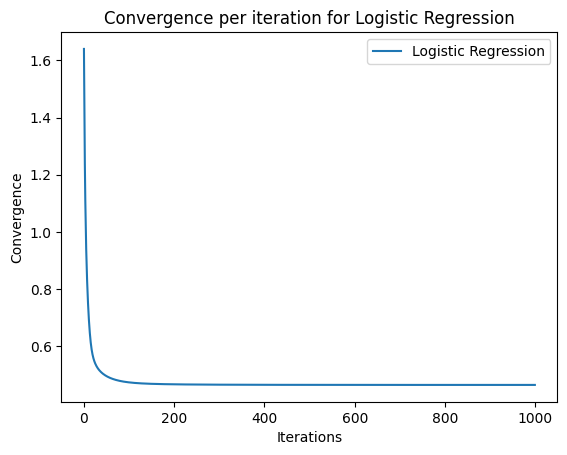

In [4]:
#initialising parameters
w = np.ones(Phi_train.shape[1]).reshape(-1,1)
lmb = 0.001
eta = 0.5
iterations = 1000

#Run Gradient Descent Algorithm 
w_hat, errors = grad_desc(log_loss, log_grad, w, Phi_train, y_train, lmb, eta, iterations)

#Producing final weights
print(f'Final weights: {w_hat.T}')

#Plotting convergence
plt.plot(errors, label=f'Logistic Regression')
plt.xlabel('Iterations')
plt.ylabel('Convergence')
plt.title('Convergence per iteration for Logistic Regression')
plt.legend()
plt.show() 

In [5]:
#starting predictions vs truth
preds = sigmoid(Phi_rest, w_hat).flatten()
actual = y_rest.flatten()
outList = []
for i in range(len(preds)):
    print(f'Prediction Vs Truth: {preds[i], actual[i]}')
    if preds[i] >= 0.5:
        outList.append(1)
    else:
        outList.append(0)
    
#Accuracy
print(f'Accuracy: {accuracy(outList, actual)}')

Prediction Vs Truth: (0.08127298086574902, 0)
Prediction Vs Truth: (0.5671773715540371, 1)
Prediction Vs Truth: (0.1617420012670353, 1)
Prediction Vs Truth: (0.0899235947212399, 0)
Prediction Vs Truth: (0.10650741595204205, 0)
Prediction Vs Truth: (0.4947140984577175, 1)
Prediction Vs Truth: (0.12450473385208623, 0)
Prediction Vs Truth: (0.11382559392132184, 0)
Prediction Vs Truth: (0.2922501453501269, 0)
Prediction Vs Truth: (0.05438648163241122, 0)
Prediction Vs Truth: (0.38450882461005254, 0)
Prediction Vs Truth: (0.5741243379247993, 1)
Prediction Vs Truth: (0.187898419200197, 0)
Prediction Vs Truth: (0.13375628305813742, 0)
Prediction Vs Truth: (0.06690793939377085, 0)
Prediction Vs Truth: (0.2873761657380843, 0)
Prediction Vs Truth: (0.30479279668400333, 0)
Prediction Vs Truth: (0.9255655363996016, 1)
Prediction Vs Truth: (0.37620253153465605, 1)
Prediction Vs Truth: (0.0790057349084001, 0)
Prediction Vs Truth: (0.07700119602213275, 0)
Prediction Vs Truth: (0.5170168839732727, 0)


Final weights: [[-3.91604293  1.97384454 -0.55171687 -1.54470981 -0.6363299  -0.35825106
  -0.05169708 -0.20727225  1.70943249]]


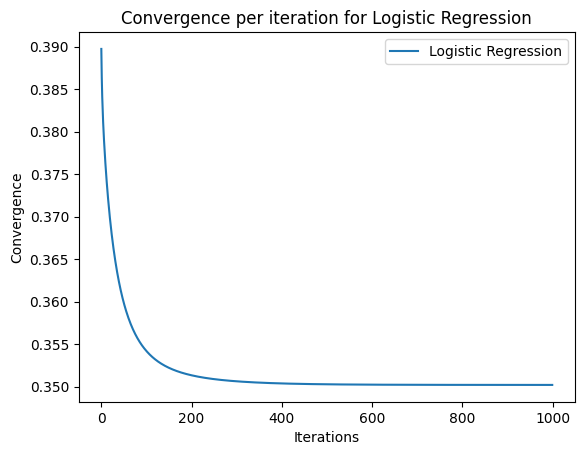

In [30]:
#initialising parameters
lmb = 0.0001
eta = 1
iterations = 1000

#Run Gradient Descent Algorithm 
w_hat2, errors = grad_desc(log_loss, log_grad, w_hat, Phi_rest, y_rest, lmb, eta, iterations)

#Producing final weights
print(f'Final weights: {w_hat2.T}')

#Plotting convergence
plt.plot(errors, label=f'Logistic Regression')
plt.xlabel('Iterations')
plt.ylabel('Convergence')
plt.title('Convergence per iteration for Logistic Regression')
plt.legend()
plt.show() 

In [31]:
#starting predictions vs truth
preds = sigmoid(Phi_rest, w_hat2).flatten()
actual = y_rest.flatten()
outList = []
for i in range(len(preds)):
    print(f'Prediction Vs Truth: {preds[i], actual[i]}')
    if preds[i] >= 0.5:
        outList.append(1)
    else:
        outList.append(0)
    
#Accuracy
print(f'Accuracy: {accuracy(outList, actual)}')

Prediction Vs Truth: (0.014424080832044137, 0)
Prediction Vs Truth: (0.8923489970245542, 1)
Prediction Vs Truth: (0.025706612877817787, 1)
Prediction Vs Truth: (0.016915957564438238, 0)
Prediction Vs Truth: (0.02248396674749624, 0)
Prediction Vs Truth: (0.8530077441859336, 1)
Prediction Vs Truth: (0.02586258672409119, 0)
Prediction Vs Truth: (0.02287182390308124, 0)
Prediction Vs Truth: (0.16173948206894645, 0)
Prediction Vs Truth: (0.009885667931367022, 0)
Prediction Vs Truth: (0.3271173289537295, 0)
Prediction Vs Truth: (0.6147389723424648, 1)
Prediction Vs Truth: (0.04727290894087959, 0)
Prediction Vs Truth: (0.028781194355132947, 0)
Prediction Vs Truth: (0.010800652760531534, 0)
Prediction Vs Truth: (0.09340914560263626, 0)
Prediction Vs Truth: (0.18467095640723052, 0)
Prediction Vs Truth: (0.982866420353357, 1)
Prediction Vs Truth: (0.34659215615853317, 1)
Prediction Vs Truth: (0.013198930965976918, 0)
Prediction Vs Truth: (0.013030397910282954, 0)
Prediction Vs Truth: (0.49519157

In [9]:
import pandas as pd
import os
#Producing prediction as CSV
#starting predictions vs truth
PRED_PROBS = sigmoid(TEST_SET, w_hat2).flatten()
FINAL_PREDICTIONS = []
for i in range(len(PRED_PROBS)):
    if PRED_PROBS[i] >= 0.5:
        FINAL_PREDICTIONS.append(1)
    else:
        FINAL_PREDICTIONS.append(0)
        
#Producing CSV
LOG_REG_SUB = pd.concat([PASSENGER_ID, pd.DataFrame(FINAL_PREDICTIONS)], axis=1)
LOG_REG_SUB.columns = ['PassengerId', 'Survived']
LOG_REG_SUB.to_csv(os.path.join('Submissions/logistic_reg_pred.csv'), index=False)